<a href="https://colab.research.google.com/github/Akshatpattiwar512/Exploratory-Data-Analysis/blob/main/Brazil_Forest_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [59]:
df = pd.read_csv('amazon.csv', encoding = 'latin1')
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [44]:
print(df.dtypes)
print(df.shape)

year        int64
state      object
month      object
number    float64
date       object
dtype: object
(6454, 5)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [57]:
print(set(df['state'].values))

{'Pará', 'Sao Paulo', 'Roraima', 'Pernambuco', 'Espirito Santo', 'Maranhao', 'Amazonas', 'Sergipe', 'Acre', 'Ceara', 'Alagoas', 'Goias', 'Distrito Federal', 'Rio', 'Mato Grosso', 'Amapa', 'Paraiba', 'Piau', 'Tocantins', 'Minas Gerais', 'Rondonia', 'Santa Catarina', 'Bahia'}


In [46]:
df.state.value_counts()

Rio                 717
Mato Grosso         478
Paraiba             478
Alagoas             240
Distrito Federal    239
Roraima             239
Sergipe             239
Santa Catarina      239
Bahia               239
Sao Paulo           239
Maranhao            239
Piau                239
Acre                239
Pernambuco          239
Amazonas            239
Tocantins           239
Pará                239
Espirito Santo      239
Amapa               239
Rondonia            239
Ceara               239
Minas Gerais        239
Goias               239
Name: state, dtype: int64

In [47]:
fig = go.Figure(data=go.Scatter(x = df.groupby(['year'])['number'].sum().index, y = df.groupby(['year'])['number'].sum().values))
fig.update_layout(title='Forest fire in Brazil over the years',
                   xaxis_title='Year',
                   yaxis_title='Number of forest fires')
fig.show()

In [48]:
fig = go.Figure(data=go.Scatter(x = df.groupby(['month'])['number'].sum().index, y = df.groupby(['month'])['number'].sum().values))
fig.update_layout(title='Forest fire distribution with respect to months (1998 - 2017)',
                   xaxis_title='Month',
                   yaxis_title='Number of forest fires')
fig.show()

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
number,20014,26883,27351,29072,37391,42761,38453,35005,33832,33037,29379,39117,37037,34634,40085,35146,39621,41208,42212,36686


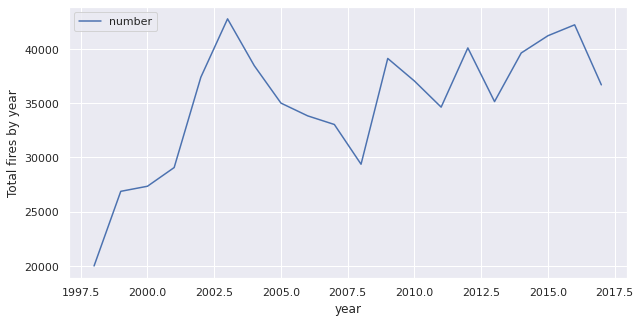

In [49]:
df_forest_fire_by_year = df.groupby(['year']).number.agg(sum)
df_forest_fire_by_year =pd.DataFrame(df_forest_fire_by_year)
df_forest_fire_by_year.number = df_forest_fire_by_year.number.map(lambda p: round(p))
df_forest_fire_by_year.plot(ylabel='Total fires by year', figsize=(10,5))
df_forest_fire_by_year.T

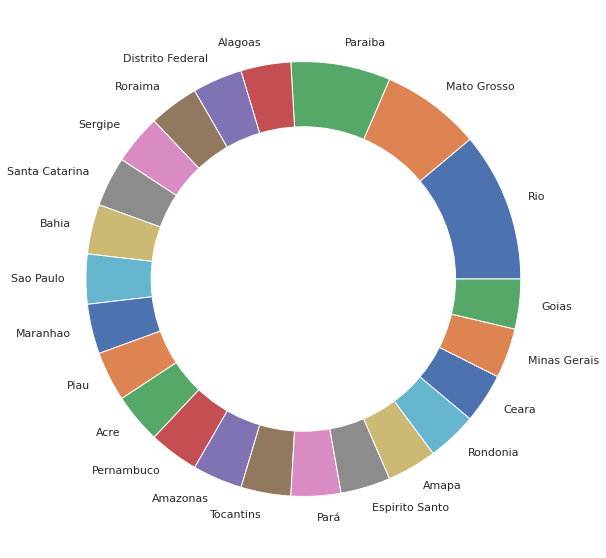

In [50]:
sns.set(rc={'figure.figsize':(15,10)})
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(df['state'].value_counts().values, labels = df['state'].value_counts().index)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [51]:
fig = px.pie(values=df['state'].value_counts().values, names=df['state'].value_counts().index,title='Cities involving forest fires')
fig.show()

In [52]:
fig = px.scatter(df, x="year", y="month",size='number')
fig.show()


In [53]:
df = df.groupby('state')['number'].mean().reset_index()
print(df)

               state      number
0               Acre   77.255356
1            Alagoas   19.350000
2              Amapa   91.345506
3           Amazonas  128.243218
4              Bahia  187.222703
5              Ceara  127.314071
6   Distrito Federal   14.899582
7     Espirito Santo   27.389121
8              Goias  157.721841
9           Maranhao  105.142808
10       Mato Grosso  201.351523
11      Minas Gerais  156.800243
12           Paraiba  109.698573
13              Pará  102.561272
14        Pernambuco  102.502092
15              Piau  158.174674
16               Rio   62.985865
17          Rondonia   84.876272
18           Roraima  102.029598
19    Santa Catarina  101.924067
20         Sao Paulo  213.896226
21           Sergipe   13.543933
22         Tocantins  141.037176


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, 'Acre'),
 Text(0, 0, 'Alagoas'),
 Text(0, 0, 'Amapa'),
 Text(0, 0, 'Amazonas'),
 Text(0, 0, 'Bahia'),
 Text(0, 0, 'Ceara'),
 Text(0, 0, 'Distrito Federal'),
 Text(0, 0, 'Espirito Santo'),
 Text(0, 0, 'Goias'),
 Text(0, 0, 'Maranhao'),
 Text(0, 0, 'Mato Grosso'),
 Text(0, 0, 'Minas Gerais'),
 Text(0, 0, 'Paraiba'),
 Text(0, 0, 'Pará'),
 Text(0, 0, 'Pernambuco'),
 Text(0, 0, 'Piau'),
 Text(0, 0, 'Rio'),
 Text(0, 0, 'Rondonia'),
 Text(0, 0, 'Roraima'),
 Text(0, 0, 'Santa Catarina'),
 Text(0, 0, 'Sao Paulo'),
 Text(0, 0, 'Sergipe'),
 Text(0, 0, 'Tocantins')]

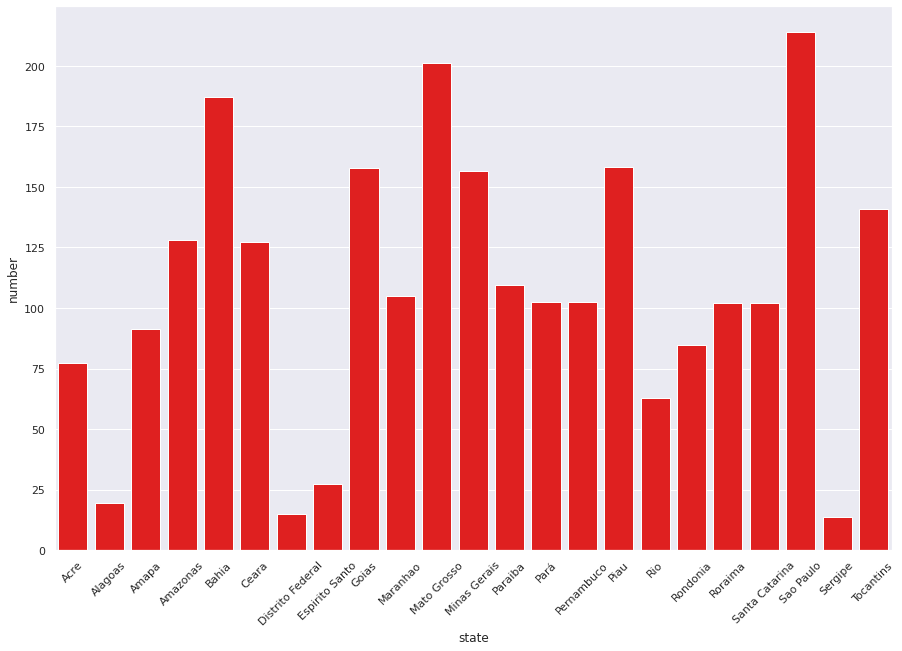

In [54]:
bar = sns.barplot(df['state'], df['number'], color = "red")
bar.set_xticklabels(df['state'], rotation=45)

 standard deviation in number of fires for each state

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, 'Acre'),
 Text(0, 0, 'Alagoas'),
 Text(0, 0, 'Amapa'),
 Text(0, 0, 'Amazonas'),
 Text(0, 0, 'Bahia'),
 Text(0, 0, 'Ceara'),
 Text(0, 0, 'Distrito Federal'),
 Text(0, 0, 'Espirito Santo'),
 Text(0, 0, 'Goias'),
 Text(0, 0, 'Maranhao'),
 Text(0, 0, 'Mato Grosso'),
 Text(0, 0, 'Minas Gerais'),
 Text(0, 0, 'Paraiba'),
 Text(0, 0, 'Pará'),
 Text(0, 0, 'Pernambuco'),
 Text(0, 0, 'Piau'),
 Text(0, 0, 'Rio'),
 Text(0, 0, 'Rondonia'),
 Text(0, 0, 'Roraima'),
 Text(0, 0, 'Santa Catarina'),
 Text(0, 0, 'Sao Paulo'),
 Text(0, 0, 'Sergipe'),
 Text(0, 0, 'Tocantins')]

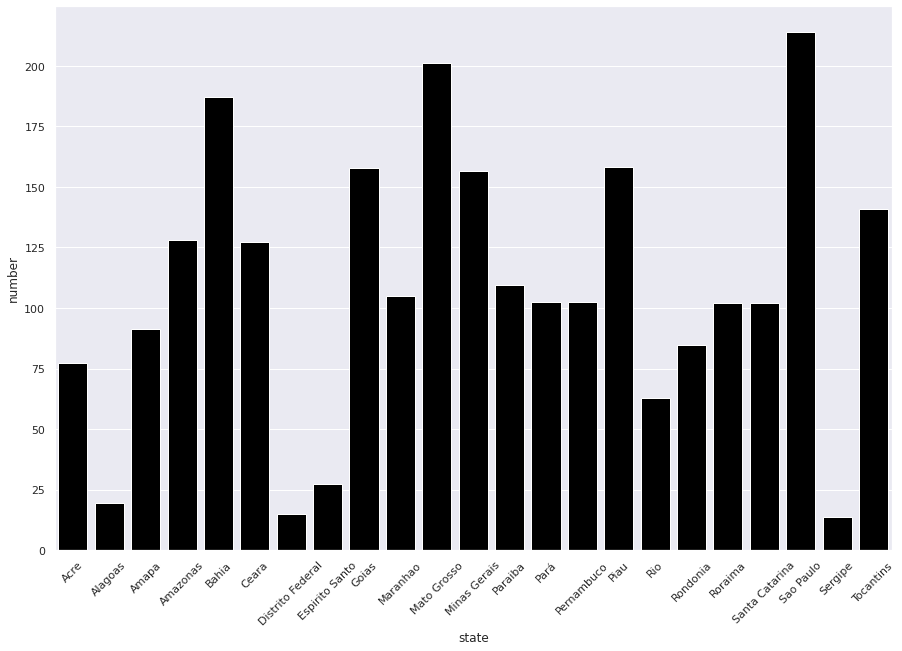

In [55]:
df = df.groupby('state')['number'].mean().reset_index()
bar = sns.barplot(df['state'], df['number'], color = "black")
bar.set_xticklabels(df['state'], rotation=45)